In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
null_counts=df.isnull().sum()
null_counts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Null values:
1. Age: 177
2. Cabin: 687
3. Embarked: 2

In [4]:
(null_counts[null_counts>0]/df.shape[0])*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

### `Missing Completely at random`

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## `Missing not completely at random`

In [6]:
df['Age_null']=np.where(df['Age'].isnull(),1,0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
df.groupby(by='Survived')['Age_null'].mean()

Survived
0    0.227687
1    0.152047
Name: Age_null, dtype: float64

22% of the people who couldn't survive doesn't have their age registered.
15% of the people who couldn't survive have their age registered.

In [8]:
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_null,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [9]:
df.groupby(by='Survived')['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

87% of the people who haven't survived, didn't ave their cabins registered.
60% of the people who haven't survived, didn't ave their cabins registered.

## `Handling missing values`
1. Mean, median, mode: Mean or median based on the distribution. In case of categorical features we can apply mode.
2. Random sample imputation.
3. Capturing NAN values with new feature.
4. End of distribution imputation.
5. Arbitrary imputation.
6. Frequent categories imputation.

## 1. Mean, median, mode

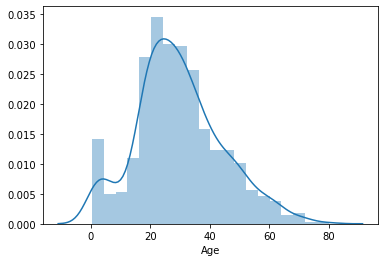

In [10]:
sns.distplot(df['Age'])

The distribution is not completely gaussian. Hence replacing using median.

In [11]:
med=df.Age.median()
df['Age_no_null']=df.Age.fillna(med)

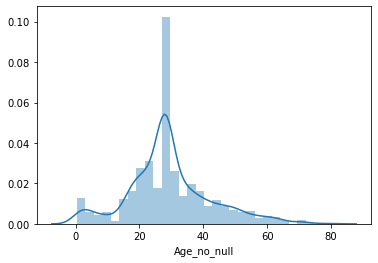

In [12]:
sns.distplot(df.Age_no_null)
plt.show()

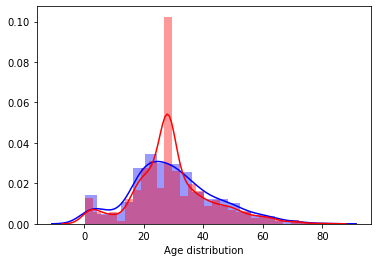

In [13]:
plt.subplot(111)
sns.distplot(df.Age, color='blue')
sns.distplot(df.Age_no_null, color='red')
plt.xlabel('Age distribution')
plt.show()

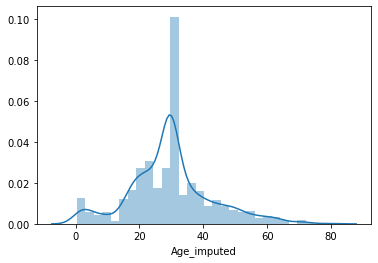

In [14]:
def impute_nan(df, variable, method):
    df[variable+"_"+"imputed"]=df[variable].fillna(method)
mean=df['Age'].mean()
impute_nan(df,'Age', mean)
sns.distplot(df['Age_imputed'])

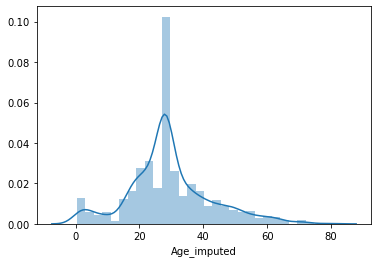

In [15]:
median=df['Age'].median()
impute_nan(df,'Age', median)
sns.distplot(df['Age_imputed'])

In [16]:
print(df['Age'].mean())
print(df['Age'].median())

29.69911764705882
28.0


In [17]:
print(df['Age'].std())
print(df['Age_no_null'].std())
print(df['Age_imputed'].std())
print('Since the std deviation is small compared nto what happened earlier and hence its good')

14.526497332334044
13.019696550973194
13.019696550973194
Since the std deviation is small compared nto what happened earlier and hence its good


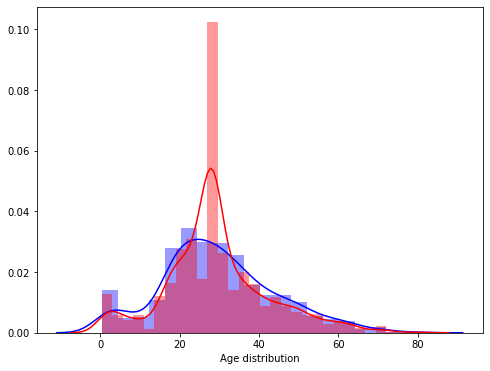

In [18]:
plt.figure(figsize=(8,6))
plt.subplot(1,1,1)
sns.distplot(df['Age'], color='blue')
sns.distplot(df['Age_imputed'], color='red')
plt.xlabel('Age distribution')
plt.show()

### Advantages and disadvantages of mean, median and mode imputations:
### Advantages
1. Easy to implement.
2. Faster way to obtain the complete dataset.

### Disadvantages
3. Change or distortion in the original variance.
4. Impacts correlation.

Mode can be applied in case of categorical variabl;es

## 2. Random sampling

In [19]:
df.Age.isnull().sum()

177

In [20]:
df['Age_func']=df.Age.fillna(0)

In [21]:
df['Age_func']=df['Age_func'].apply(lambda x: np.random.choice(df[~(df['Age_func']==0)]['Age_func']) if x==0 else x)

In [22]:
df['Age_func'].isnull().sum()

0

In [23]:
df['Age'].isnull().sum()

177

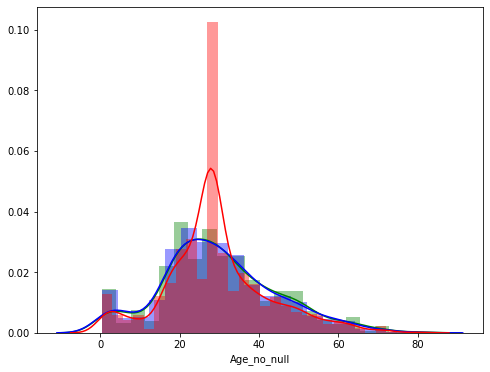

In [24]:
#df['Age_random'] = pd.to_numeric(df['Age_random'], errors='coerce')
# df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
plt.figure(figsize=(8,6))
plt.subplot(111)

sns.distplot(df['Age_func'], color='green')
sns.distplot(df['Age'], color='blue')
sns.distplot(df['Age_no_null'], color='red')
plt.show()

### Advantages:
1. Easy to implement.
2. No distortion in variance.

### Disadvantages:
1. Not applicable in all business scenarios.

## 3. Capturing NAN values with new feature.

### This method captures the importance of missingness.
Let's say the column Age had missing values.

We can make a new feature named Age_NaN where if there was null value in Age, Age_NaN will have 1 or else it will have 0. Now, later we might impute the NaN value in the Age field. But the information in the field Age_NaN if used for model training, the model might learn some information out of it.

### Disadvantages:
1. If we have 200 features already and we are implementing this method, we are doing nothing but just adding more number of features. This builds upto the curse of dimanesionality.

## 4. End of distribution imputation.

Applicable when missing values are not at random: If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

Used to capture the importance of Null values

In [42]:
data=pd.read_csv('titanic.txt', usecols=['Survived', 'Age', 'Fare', 'Cabin'])

In [43]:
data.head()

,Survived,Age,Fare,Cabin
0,0,22.0,7.2500,NaN
1,1,38.0,71.2833,C85
2,1,26.0,7.9250,NaN
3,1,35.0,53.1000,C123
4,0,35.0,8.0500,NaN


In [44]:
data['Age_NaN']=np.where(data.Age.isnull(),1,0)
data.groupby(by='Survived')['Age_NaN'].mean()

Survived
0    0.227687
1    0.152047
Name: Age_NaN, dtype: float64

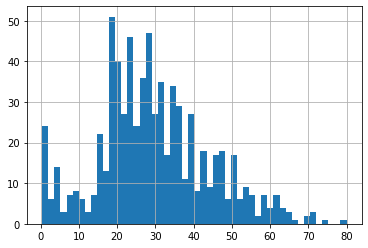

In [45]:
data.Age.hist(bins=50)
plt.show()

In [46]:
data=data.drop('Age_NaN', axis=1)

In [47]:
extreme=data.Age.mean()+(3*data.Age.std())
data['Age_imputed']=data.Age.fillna(extreme)
data['Age'].fillna(data.Age.median(), inplace=True)

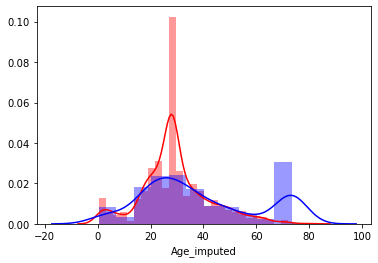

In [48]:
plt.subplot(111)
sns.distplot(data.Age, color='red')
sns.distplot(data['Age_imputed'], color='blue')
plt.show()

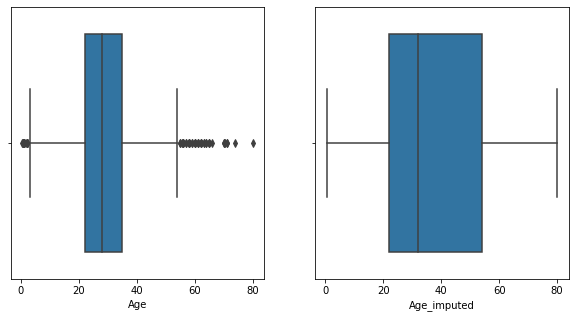

In [65]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data.Age)
plt.subplot(1,2,2)
sns.boxplot(data['Age_imputed'])
plt.show()

## Advantages:
1. Easy to implement.
2. Captures the importance of missingness.

## Disadvantages:
1. Distorts the original distribution of the variable.
2. If missingness is not important it may mask the predictive power of the original variable since the dustribution is distorted.
3. If number of NA is a lot, outliers will be masked.
4. If number of NA is small, the replacement will appear as outlier.

# `Categorical features`

In [69]:
house=pd.read_csv('train.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [70]:
house.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [75]:
house.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

## Frequent Category Imputation

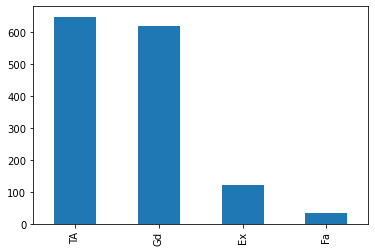

In [79]:
house['BsmtQual'].value_counts().plot.bar()
plt.show()

In [83]:
house['BsmtQual'].value_counts().index[0]

'TA'

In [84]:
def impute_nan_catg(dataframe,variable):
    most_freq_var=dataframe[variable].value_counts().index[0]
    dataframe[variable].fillna(most_freq_var, inplace=True)

In [87]:
for i in ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice']:
    impute_nan_catg(house, i)
house.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

## Advantages:
1. Easy and fast to implement

## Disadvantages:
1. Since nulls are replaced with the most frequent categories, it might have an unnecessary extra numbers of those values

## 2. Capture NAN with new features.

In [105]:
house=pd.read_csv('train.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [106]:
house.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

In [107]:
house['BsmtQual_var']=np.where(house['BsmtQual'].isnull(),1,0)
house.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [112]:
frequent=house['BsmtQual'].mode()[0]
frequent

'TA'

In [113]:
house['BsmtQual'].fillna(frequent,inplace=True)

In [114]:
house['BsmtQual'].isna().sum()

0

In [115]:
house['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

Whenever we have a feature with lots of missing values we can use this technique

#### Suppose we have a feature with more frequent categories, we can replace NAN values with a new category(Null values replacement)

In [135]:
house=pd.read_csv('train.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [136]:
house.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [137]:
house.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

In [138]:
for i in house.columns:
    house[i+'_var']=np.where(house[i].isnull(),'Missing',house[i])
    house.drop(i,axis=1,inplace=True)

In [139]:
house.head()

,BsmtQual_var,FireplaceQu_var,GarageType_var,SalePrice_var
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [141]:
house['BsmtQual_var'].unique()

array(['Gd', 'TA', 'Ex', 'Missing', 'Fa'], dtype=object)

# `One Hot Encoding`

In [145]:
titanic=pd.read_csv('titanic.txt', usecols=['Sex'])
titanic.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [147]:
new=pd.get_dummies(titanic['Sex'], drop_first=True)

In [148]:
titanic['new_male']=new
titanic.drop('Sex', axis=1, inplace=True)

In [149]:
titanic.head()

,new_male
0,1
1,0
2,0
3,0
4,1


# `Multi hot encoding with more variables1`

In [255]:
house=pd.read_csv('train.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
house.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [256]:
house.isnull().sum().sort_values(ascending=False)

FireplaceQu    690
GarageType      81
BsmtQual        37
SalePrice        0
dtype: int64

In [257]:
house['BsmtQual'].fillna('Missing', inplace=True)
house.BsmtQual.value_counts()

TA         649
Gd         618
Ex         121
Missing     37
Fa          35
Name: BsmtQual, dtype: int64

In [258]:
new=pd.get_dummies(house['BsmtQual'], drop_first=True)

In [259]:
list1=[]
for i in new.columns:
    list1.append('BsmtQual_'+i)
new.columns=list1
new.head()

,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


In [260]:
house=house.join(new)
house.drop('BsmtQual', axis=1, inplace=True)

In [261]:
house.head()

,FireplaceQu,GarageType,SalePrice,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA
0,NaN,Attchd,208500,0,1,0,0
1,TA,Attchd,181500,0,1,0,0
2,TA,Attchd,223500,0,1,0,0
3,Gd,Detchd,140000,0,0,0,1
4,TA,Attchd,250000,0,1,0,0


In [262]:
for i in ['FireplaceQu', 'GarageType']:
    house[i].fillna('Missing',inplace=True)
    new=pd.get_dummies(house[i], drop_first=True)
    list1=[]
    for j in new.columns:
        list1.append(i+'_'+j)
    new.columns=list1
    house=house.join(new)
    house.drop(i, axis=1, inplace=True)

# house.head()

In [263]:
house.head()

,SalePrice,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing
0,208500,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
1,181500,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
2,223500,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
3,140000,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
4,250000,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0


When the number of categories is too much, we can determine the top 10-15 categories based on domain knowledge by value_vounts and sort. get dummy variables for them and move on.

# Datetime

In [299]:
import datetime

In [300]:
today=datetime.datetime.today()
today

datetime.datetime(2021, 4, 9, 19, 40, 26, 205052)

In [301]:
today-datetime.timedelta(3)

datetime.datetime(2021, 4, 6, 19, 40, 26, 205052)

In [302]:
day=[today-datetime.timedelta(x) for x in range(0,15)]

In [303]:
df=pd.DataFrame(day)
df.columns=['Day']
df.head()

,Day
0,2021-04-09 19:40:26.205052
1,2021-04-08 19:40:26.205052
2,2021-04-07 19:40:26.205052
3,2021-04-06 19:40:26.205052
4,2021-04-05 19:40:26.205052


In [304]:
df

,Day
0,2021-04-09 19:40:26.205052
1,2021-04-08 19:40:26.205052
2,2021-04-07 19:40:26.205052
3,2021-04-06 19:40:26.205052
4,2021-04-05 19:40:26.205052
5,2021-04-04 19:40:26.205052
6,2021-04-03 19:40:26.205052
7,2021-04-02 19:40:26.205052
8,2021-04-01 19:40:26.205052
9,2021-03-31 19:40:26.205052


In [305]:
df['Weekday']=df['Day'].dt.weekday

In [306]:
df

,Day,Weekday
0,2021-04-09 19:40:26.205052,4
1,2021-04-08 19:40:26.205052,3
2,2021-04-07 19:40:26.205052,2
3,2021-04-06 19:40:26.205052,1
4,2021-04-05 19:40:26.205052,0
5,2021-04-04 19:40:26.205052,6
6,2021-04-03 19:40:26.205052,5
7,2021-04-02 19:40:26.205052,4
8,2021-04-01 19:40:26.205052,3
9,2021-03-31 19:40:26.205052,2


In [307]:
dic1={0:'mon',1:'tues',2:'wed',3:'thur',4:'fri',5:'sat',6:'sun'}
df['Weekday']=df['Weekday'].map(dic1)

In [308]:
df

,Day,Weekday
0,2021-04-09 19:40:26.205052,fri
1,2021-04-08 19:40:26.205052,thur
2,2021-04-07 19:40:26.205052,wed
3,2021-04-06 19:40:26.205052,tues
4,2021-04-05 19:40:26.205052,mon
5,2021-04-04 19:40:26.205052,sun
6,2021-04-03 19:40:26.205052,sat
7,2021-04-02 19:40:26.205052,fri
8,2021-04-01 19:40:26.205052,thur
9,2021-03-31 19:40:26.205052,wed
